# Scintillation bar

In this example, we have a $10 \times 0.6 \times 0.6$ cm$^3$ teflon wrapped scintillator (LaBr$_3$ crystal), centered in the world and the longest size being along the $x$ axis. It is irradiated with a $^{22}$Na point source set a 4 cm above ($z$ direction) the center of the crystal. The source is monoenergetic and $\gamma$-rays are only fired along the z-axis, towards the crystal. One photodetectors are set on each end of the scintillator (at $x=-5$ cm and $x=5$ cm), with the *perfect_apd* detection feature.

- After running the simulation the Hits are stored in the *ScanPos_0.hits.npy* numpy file.
- The goals of this exercise are the following:
    - Selecting scintillation events corresponding to a single photoelectric absorption of 511 keV and then counting how many optical photons have reach each photodetector for these events. For this you will have to:
        - find which *eventID* correspond to these events (hint: you can use the `numpy.unique` function) ;
        - for each event: differentiate optical photons and $\gamma$-rays based on their *PDGEncoding value (0 for optical photons and 22 for $\gamma$-rays) ;
        - For a single event, you can display the histograms of the x-positions, y-postions and z-positions and then study for the x-positions hitogram which population correspond to which process.
    - Doing the same study with event either obtained with one or several compton/photoelectric interactions and studying the quantity of collected optical photons as a function of the deposited energy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hits = np.load('ScanPos_0.hits.npy')

In [3]:
print(hits.dtype)

[('PDGEncoding', '<i4'), ('trackID', '<i4'), ('parentID', '<i4'), ('trackLocalTime', '<f8'), ('time', '<f8'), ('runID', '<i4'), ('eventID', '<i4'), ('sourceID', '<i4'), ('primaryID', '<i4'), ('posX', '<f4'), ('posY', '<f4'), ('posZ', '<f4'), ('localPosX', '<f4'), ('localPosY', '<f4'), ('localPosZ', '<f4'), ('momDirX', '<f4'), ('momDirY', '<f4'), ('momDirZ', '<f4'), ('edep', '<f4'), ('stepLength', '<f4'), ('trackLength', '<f4'), ('rotationAngle', '<f4'), ('axialPos', '<f4'), ('processName', 'S32'), ('comptVolName', 'S32'), ('RayleighVolName', 'S32'), ('volumeID[0]', '<i4'), ('volumeID[1]', '<i4'), ('volumeID[2]', '<i4'), ('volumeID[3]', '<i4'), ('volumeID[4]', '<i4'), ('volumeID[5]', '<i4'), ('volumeID[6]', '<i4'), ('volumeID[7]', '<i4'), ('volumeID[8]', '<i4'), ('volumeID[9]', '<i4'), ('sourcePosX', '<f4'), ('sourcePosY', '<f4'), ('sourcePosZ', '<f4'), ('nPhantomCompton', '<i4'), ('nCrystalCompton', '<i4'), ('nPhantomRayleigh', '<i4'), ('nCrystalRayleigh', '<i4'), ('', '<i4'), ('level1

In [4]:
eid = np.unique(hits["eventID"])

In [5]:
cond = hits['edep'] == 0.511
print(cond.sum(), len(eid))
g_eid = hits["eventID"][cond]

39 245


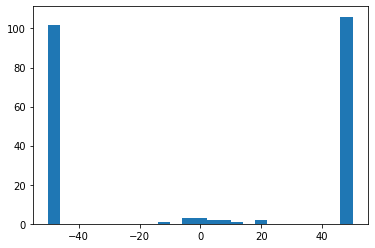

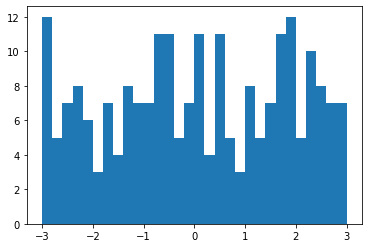

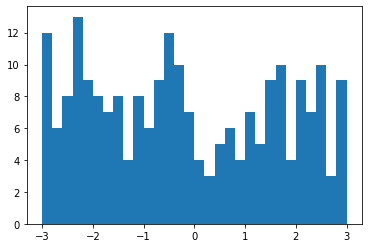

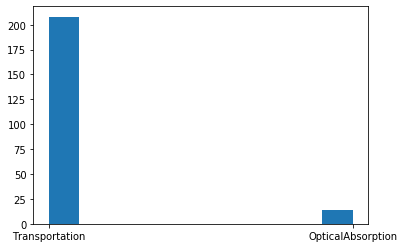

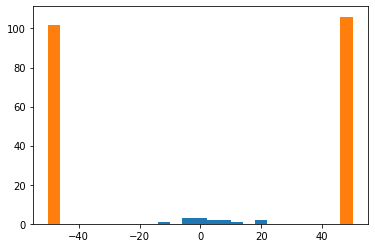

In [6]:
l_phot = np.zeros(len(g_eid))
r_phot = np.zeros(len(g_eid))
cond_opt = hits["PDGEncoding"] == 0

cond_evt = hits["eventID"] == g_eid[0]
opt_hits = hits[cond_evt & cond_opt]
x_pos = opt_hits["posX"]
y_pos = opt_hits["posY"]
z_pos = opt_hits["posZ"]
    
proc = opt_hits["processName"]
    
plt.figure()
plt.hist(x_pos, bins=25, range=(-50, 50))
    
plt.figure()
plt.hist(y_pos, bins=30, range=(-3, 3))
    
plt.figure()
plt.hist(z_pos, bins=30, range=(-3, 3))
    
plt.figure()
plt.hist(proc, bins=10)
    
plt.figure()
plt.hist(x_pos[proc == b"OpticalAbsorption"], bins=25, range=(-50, 50))
plt.hist(x_pos[proc == b"Transportation"], bins=25, range=(-50, 50))
    
# plt.figure()
# plt.hist(x_pos[proc == b"Transportation"], bins=25, range=(-60, 60))
    
plt.show()

In [7]:
for i in range(len(g_eid)):
    cond_evt = hits["eventID"] == g_eid[i]
    opt_hits = hits[cond_evt & cond_opt]
    x_pos = opt_hits["posX"]
    proc = opt_hits["processName"]
    l_phot[i] = np.sum((x_pos < 0) & (proc == b"Transportation"))
    r_phot[i] = np.sum((x_pos > 0) & (proc == b"Transportation"))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,
        11.,  9.,  8.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200.]),
 <a list of 1 Patch objects>)

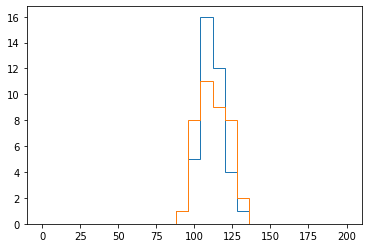

In [8]:
plt.figure()
plt.hist(l_phot, bins=25, range=(0, 200), histtype='step')
plt.hist(r_phot, bins=25, range=(0, 200), histtype='step')

(array([ 221.,  484.,  745.,  828., 1058., 1284., 2372., 2138., 2318.,
        1516., 2340.,  686., 4366., 3027., 3906., 3207.,  512.,    0.,
         523.,    0.,    0.,    0.,  292.,    0.,    0.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200.]),
 <a list of 1 Patch objects>)

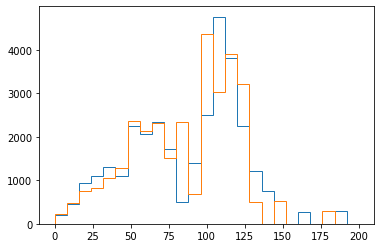

In [9]:
b_eid = hits["eventID"][~cond]
l_phot = np.zeros(len(b_eid))
r_phot = np.zeros(len(b_eid))

for i in range(len(b_eid)):
    cond_evt = hits["eventID"] == b_eid[i]
    opt_hits = hits[cond_evt & cond_opt]
    x_pos = opt_hits["posX"]
    proc = opt_hits["processName"]
    l_phot[i] = np.sum((x_pos < 0) & (proc == b"Transportation"))
    r_phot[i] = np.sum((x_pos > 0) & (proc == b"Transportation"))
    
plt.figure()
plt.hist(l_phot, bins=25, range=(0, 200), histtype='step')
plt.hist(r_phot, bins=25, range=(0, 200), histtype='step')

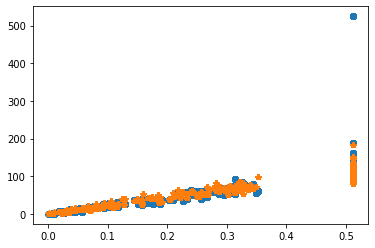

In [10]:
b_eid = hits["eventID"][~cond]
l_phot = np.zeros(len(b_eid))
r_phot = np.zeros(len(b_eid))
energy = np.zeros(len(b_eid))

cond_gam = hits["PDGEncoding"] == 22
for i in range(len(b_eid)):
    cond_evt = hits["eventID"] == b_eid[i]
    opt_hits = hits[cond_evt & cond_opt]
    gam_hits = hits[cond_evt & cond_gam]
    edep = gam_hits["edep"]
    x_pos = opt_hits["posX"]
    proc = opt_hits["processName"]
    l_phot[i] = np.sum((x_pos < 0) & (proc == b"Transportation"))
    r_phot[i] = np.sum((x_pos > 0) & (proc == b"Transportation"))
    energy[i] = np.sum(edep)
    
plt.figure()
plt.plot(energy, l_phot, 'o')
plt.plot(energy, r_phot, '*')
plt.show()